In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
# Set the seed for reproducibility
tf.random.set_seed(42)

In [4]:
train_path = r'C:\Users\Lenovo\Desktop\training_set'
test_path = r'C:\Users\Lenovo\Desktop\test_set'

In [5]:
# Data preprocessing and augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [6]:
# Generate batches of augmented training and testing data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [7]:
# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model and collect accuracy values
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/10
250/250 [==============================] - 344s 1s/step - loss: 0.6879 - accuracy: 0.5584 - val_loss: 0.6507 - val_accuracy: 0.6052
Epoch 2/10
250/250 [==============================] - 289s 1s/step - loss: 0.6194 - accuracy: 0.6553 - val_loss: 0.6122 - val_accuracy: 0.6602
Epoch 3/10
250/250 [==============================] - 288s 1s/step - loss: 0.5667 - accuracy: 0.7104 - val_loss: 0.5097 - val_accuracy: 0.7480
Epoch 4/10
250/250 [==============================] - 290s 1s/step - loss: 0.5132 - accuracy: 0.7473 - val_loss: 0.4701 - val_accuracy: 0.7743
Epoch 5/10
250/250 [==============================] - 290s 1s/step - loss: 0.4770 - accuracy: 0.7767 - val_loss: 0.4691 - val_accuracy: 0.7927
Epoch 6/10
250/250 [==============================] - 295s 1s/step - loss: 0.4469 - accuracy: 0.7922 - val_loss: 0.4787 - val_accuracy: 0.7768
Epoch 7/10
250/250 [==============================] - 340s 1s/step - loss: 0.4165 - accuracy: 0.8033 - val_loss: 0.4464 - val_accuracy: 0.7966

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

64/64 - 15s - loss: 0.4377 - accuracy: 0.8131 - 15s/epoch - 239ms/step
Test accuracy: 0.8131487965583801


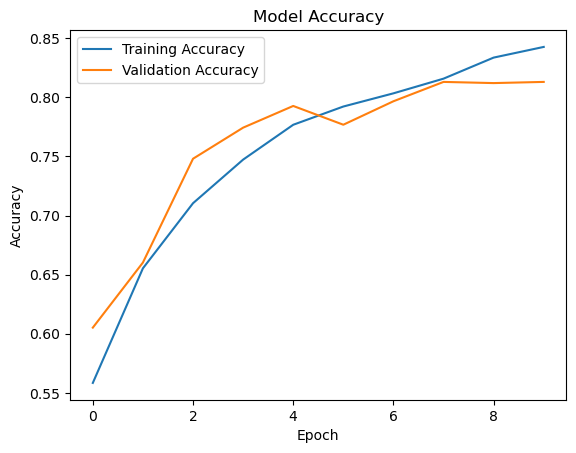

In [12]:
# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [14]:
# Save the model
model.save('dog_cat_classifier_model.h5')